# Step 7: 2D Diffusion

The next step 8 will combine steps 6 and 7 to solve Burgers' equation.

2D diffusion equation: 
$$\frac{\partial u}{\partial t} = \nu \left(\frac{\partial ^2 u}{\partial x^2} + \frac{\partial ^2 u}{\partial y^2}\right)$$

Discretize the equation:

$$ \frac {u^{n+1}_{i,j} - u^{n}_{i,j}}{\Delta t} = \nu\frac {u^{n}_{i+1,j} - 2u^{n}_{i,j} + u^{n}_{i-1,j}}{\Delta x^2} + + \nu\frac{u^{n}_{i,j+1} - 2u^{n}_{i,j} + u^{n}_{i,j-1}}{\Delta y^2}  $$

Now solving for $u^{n+1}_{i,j}$ :

$$u^{n+1}_{i,j} = u^{n}_{i,j} + \frac{\nu\Delta t}{\Delta x^2} \left(u^{n}_{i+1,j} - 2u^{n}_{i,j} - u^{n}_{i-1,j} \right)  + \frac{\nu\Delta t}{\Delta y^2} \left(u^{n}_{i,j+1} - 2u^{n}_{i,j} - u^{n}_{i,j-1} \right)$$

In [2]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
## variable declaration

nx = 31
ny = 31
nt = 17
nu = 0.05
dx = 2/(nx - 1)
dy = 2/(ny - 1)
sigma = 0.25
dt = sigma * dx * dy / nu

x = numpy.linspace(0,2,nx)
y = numpy.linspace(0,2,ny)

u = numpy.ones((ny,nx))
un = numpy.ones((ny,nx))

## assign I.C's
u[int(0.5/dy):int(1/dy+1),int(0.5/dx):int(1/dx+1)] = 2

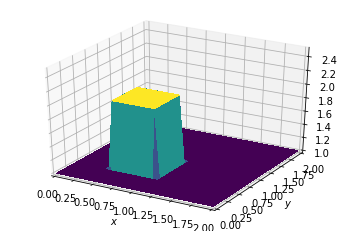

In [8]:
fig = pyplot.figure()
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x,y)
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_zlim(1, 2.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

### Creating a function to create a result for a time step of interest
Now we will want to create multiple figures to compare the system at different time steps. The function will take the time interval of interest as the input.

*Note: Now that we are using the central differnce method with array slicing, the focus area has shrunk by 1 index position on both X and Y axes. This means we can look both in-front and behind the focus range.*

In [14]:
### creating a function to run to 'nt' time steps and produce a figure
def diffuse(nt):
    # set initial condition
    u[int(0.5/dy):int(1/dy+1),int(0.5/dx):int(1/dx+1)] = 2
    
    # solve for nt steps
    for n in range(nt+1):
        un = u.copy()
        u[1:-1,1:-1] = un[1:-1,1:-1] + nu*dt/dx**2 * (un[1:-1, 2:] - 2*un[1:-1,1:-1] + un[1:-1:,:-2]) +  nu*dt/dy**2 * (un[2:, 1:-1] - 2*un[1:-1,1:-1] + un[0:-2,1:-1])
        
        #re-setting B.C.
        u[0,:]=1;u[-1,:]=1;u[:,0]=1;u[:,-1]=1
        
    #plot figure
    fig = pyplot.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, u[:], rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=True)
    ax.set_zlim(1, 2.5)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$');

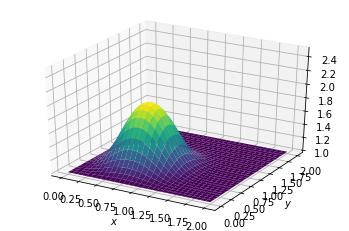

In [15]:
diffuse(10)

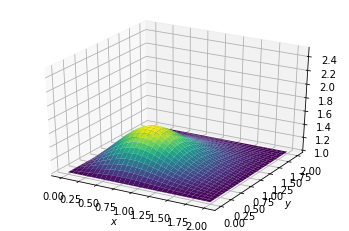

In [19]:
diffuse(40)